In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [12]:
df = pd.read_csv('../covid_dataset/country_wise_latest.csv')

# Task 1. Data Loading and Finding the Missing and NULL Values

In [25]:
# Find the Missing Value
find_missing = df.isna().sum()
# Find the duplicate value
df.duplicated().sum()

np.int64(0)

### The data above is all set, no issue with the data

# Task 2. Key Metrics Calculation

In [33]:
# Mortality Rate
df['Mortality Rate'] = df['Deaths'] / df['Confirmed'].where(df['Confirmed'] != 0)

# Recovery Rate
df['Recovery Rate'] = df['Recovered'] / df['Confirmed'].where(df['Confirmed'] != 0)

# 1 week % increase
df['1 week increase'] = ((df['Confirmed'] - df['Confirmed last week']) / df['Confirmed last week']) * 100

# Death vs Recovery Ratio
df['Deaths and Recovery Ratio'] = df['Deaths'] / df['Recovered']
df.head(1)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Mortality Rate,Recovery Rate,1 week increase,Deaths and Recovery Ratio
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0.034994,0.694868,2.074537,0.050361


# Task 3. Visualizations

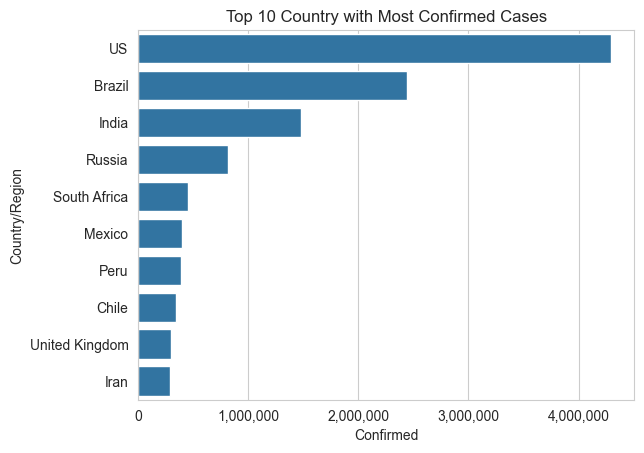

In [85]:
# Part A. # Top 10 countries by confirmed cases
top_10_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)
# print(top_10[['Country/Region', 'Confirmed']].reset_index(drop=True))
sns.set_style('whitegrid')
plt.title('Top 10 Country with Most Confirmed Cases')
ax = sns.barplot(data=top_10_confirmed, x='Confirmed', y='Country/Region')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

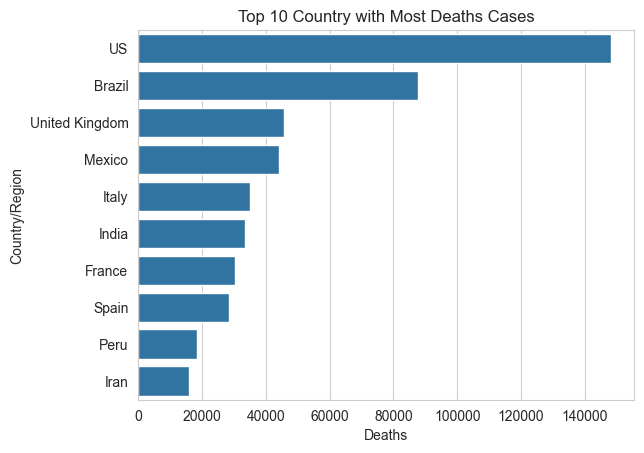

In [87]:
# Part B. Top 10 countries by death count
top_10_death = df.sort_values(by='Deaths', ascending=False).head(10)
# print(top_10_death[['Country/Region', 'Deaths']].reset_index(drop=True))
plt.title('Top 10 Country with Most Deaths Cases')
sns.barplot(data=top_10_death, x='Deaths', y='Country/Region')
plt.show()

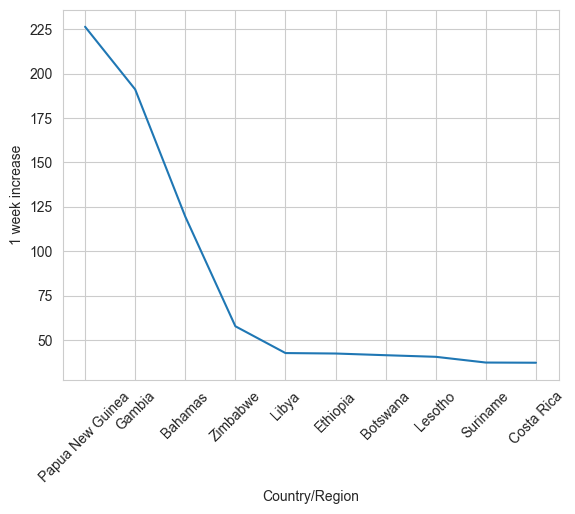

In [109]:
# Part C. 1-week % increase for top 10 fastest-growing countries
top_10_growing = df.sort_values(by='1 week increase', ascending=False).head(10)
# print(top_10_growing[['Country/Region', '1 week increase']].reset_index(drop=True))
plt.xticks(rotation=45)  # or 60 or 90 depending on what fits best
sns.lineplot(data=top_10_growing, x='Country/Region', y='1 week increase')
plt.show()

<Axes: >

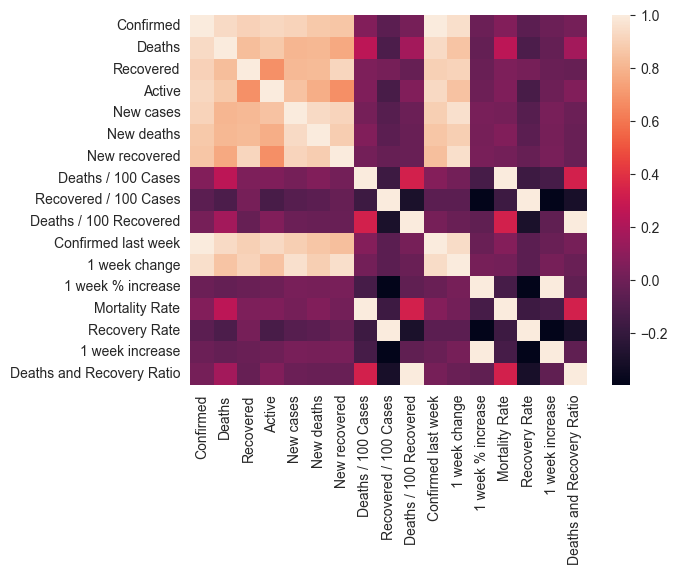

In [115]:
# Part D. Correlation matrix of numeric fields 
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(data=correlation_matrix)

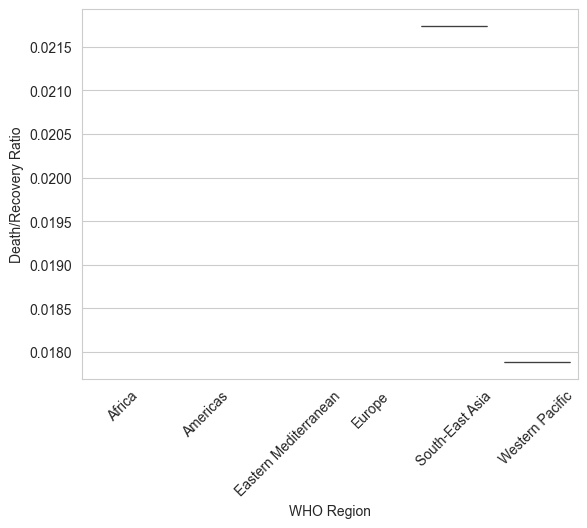

In [124]:
df['Death/Recovery Ratio'] = df['Deaths'] / df['Recovered']

death_comparison = df.groupby('WHO Region')['Death/Recovery Ratio'].mean().reset_index()
# print(death_comparison)
plt.xticks(rotation=45)
sns.boxenplot(data=death_comparison, x='WHO Region', y='Death/Recovery Ratio')
plt.show()

# Task 4. Region-Level Aggregation

In [135]:
# Part 1. Sum confirmed, deaths, recovered
# df.head()
total_confirmed = df.groupby('WHO Region')['Confirmed'].sum()
print("----------Total Confirmed Cases are-----------\n", total_confirmed.reset_index())

total_death = df.groupby('WHO Region')['Deaths'].sum()
print("\n\n\n----------Total Death Cases are-----------\n", total_death.reset_index())

total_recovered = df.groupby('WHO Region')['Recovered'].sum()
print("\n\n\n----------Total Death Cases are-----------\n", total_recovered.reset_index())

----------Total Confirmed Cases are-----------
               WHO Region  Confirmed
0                 Africa     723207
1               Americas    8839286
2  Eastern Mediterranean    1490744
3                 Europe    3299523
4        South-East Asia    1835297
5        Western Pacific     292428



----------Total Death Cases are-----------
               WHO Region  Deaths
0                 Africa   12223
1               Americas  342732
2  Eastern Mediterranean   38339
3                 Europe  211144
4        South-East Asia   41349
5        Western Pacific    8249



----------Total Death Cases are-----------
               WHO Region  Recovered
0                 Africa     440645
1               Americas    4468616
2  Eastern Mediterranean    1201400
3                 Europe    1993723
4        South-East Asia    1156933
5        Western Pacific     206770
